In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('Facebook_Marketplace_data.csv')
original_df = df.copy()
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


# Data preprocessing


##### Step 1. Changing data type of [status_published] feature from object to datetime64

In [3]:
df['status_published'] = pd.to_datetime(df['status_published'])
df['status_published'].info

<bound method Series.info of 0      2018-04-22 06:00:00
1      2018-04-21 22:45:00
2      2018-04-21 06:17:00
3      2018-04-21 02:29:00
4      2018-04-18 03:22:00
               ...        
7045   2016-09-24 02:58:00
7046   2016-09-23 11:19:00
7047   2016-09-21 23:03:00
7048   2016-09-20 00:43:00
7049   2016-09-10 10:30:00
Name: status_published, Length: 7050, dtype: datetime64[ns]>

##### Step 2. Drop the irrelevant features

In [4]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
df = df.drop(['status_id','Column1','Column2','Column3','Column4'],axis=1)
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0
7046,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0
7047,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0
7048,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0


In [6]:
df['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
X = df.iloc[:,:]
X.head()


,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [9]:
# transformer = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False, drop = 'first'),['status_type'])],remainder='passthrough')
transformer = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),['status_type'])],remainder='passthrough')

In [10]:

X_trf = transformer.fit_transform(X)

# Get feature names and clean them
feature_names = transformer.get_feature_names_out()
# df = pd.get_dummies(df,columns=['status_type'],drop_first=True)

# Remove 'encoder__' and 'remainder__' prefixes
clean_feature_names = [name.replace('encoder__', '').replace('remainder__', '') for name in feature_names]

# Convert to DataFrame with cleaned column names
df = pd.DataFrame(X_trf, columns=clean_feature_names)

df.head()


,status_type_link,status_type_photo,status_type_status,status_type_video,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.0,0.0,0.0,1.0,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,0.0,1.0,0.0,0.0,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,0.0,0.0,0.0,1.0,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,0.0,1.0,0.0,0.0,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,0.0,1.0,0.0,0.0,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [11]:
df.shape

(7050, 14)

# Question 1.
##### 1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

Text(0, 0.5, 'Number of reactions')

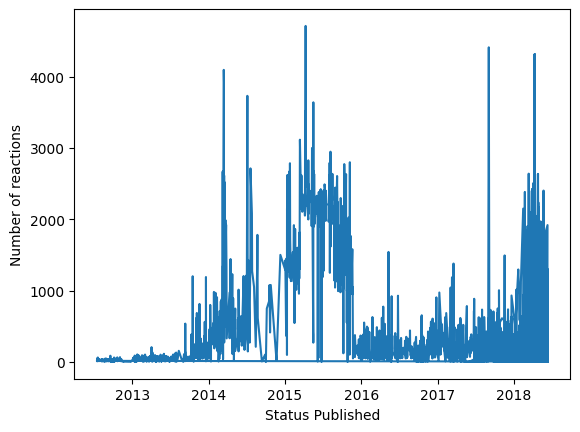

In [12]:
plt.plot(df['status_published'],df['num_reactions'])
plt.xlabel("Status Published")
plt.ylabel("Number of reactions")

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_2648\198888442.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('status_published').resample('M')['num_reactions'].mean().plot()


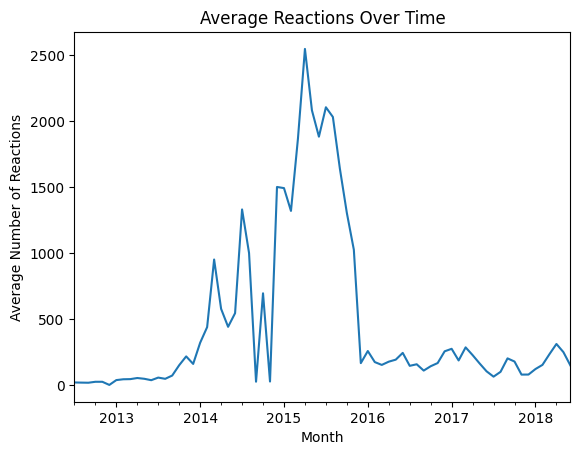

In [13]:
# Group by month and calculate mean reactions
df.set_index('status_published').resample('M')['num_reactions'].mean().plot()
plt.xlabel("Month")
plt.ylabel("Average Number of Reactions")
plt.title("Average Reactions Over Time")
plt.show()

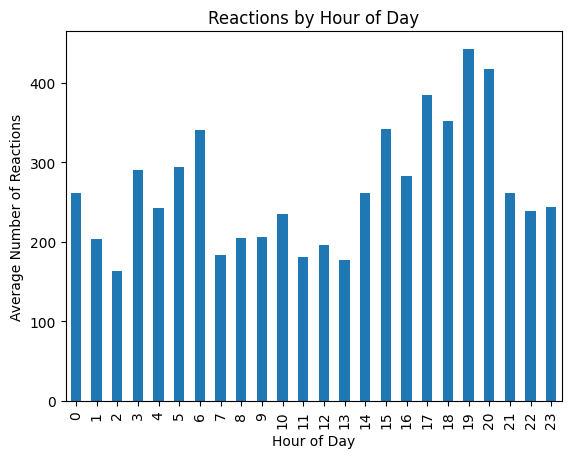

In [14]:
# Extract hour and weekday
new_df = df.copy()
new_df['hour'] = new_df['status_published'].dt.hour
new_df['weekday'] = new_df['status_published'].dt.day_name()

# Average reactions by hour
new_df.groupby('hour')['num_reactions'].mean().plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Reactions")
plt.title("Reactions by Hour of Day")
plt.show()

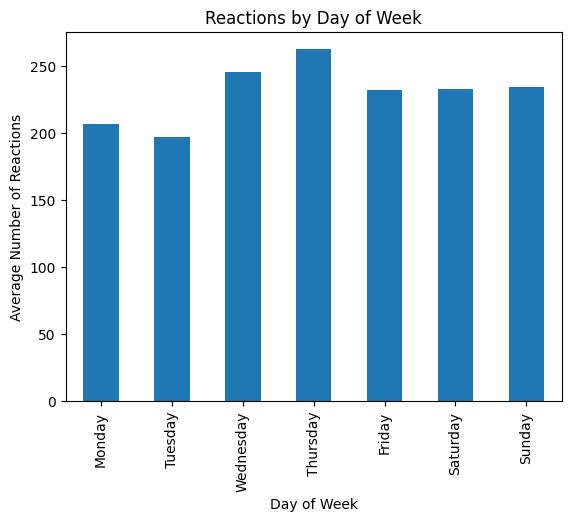

In [15]:
# Average reactions by weekday
new_df.groupby('weekday')['num_reactions'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar')
plt.xlabel("Day of Week")
plt.ylabel("Average Number of Reactions")
plt.title("Reactions by Day of Week")
plt.show()

# Question 2
##### 2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


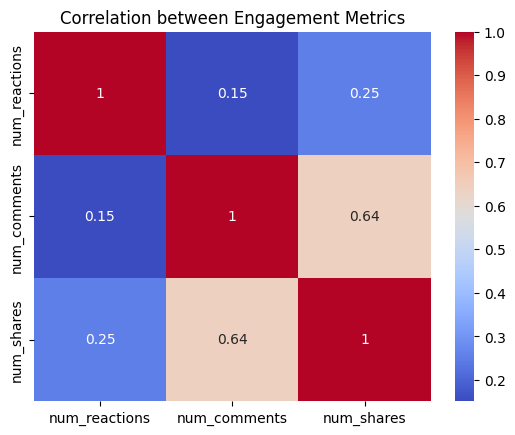

In [16]:
# Correlation matrix for engagement metrics
engagement_metrics = df[['num_reactions', 'num_comments', 'num_shares']]
correlation_matrix = engagement_metrics.corr()
print(correlation_matrix)

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Engagement Metrics")
plt.show()

# Question 4
##### 4.	Use the elbow method to find the optimum number of clusters.

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
X_new = df.drop(columns=['status_published'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
X_scaled

array([[-0.09495654, -1.24599285, -0.23366611, ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.09495654,  0.80257282, -0.23366611, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.09495654, -1.24599285, -0.23366611, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.09495654,  0.80257282, -0.23366611, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.09495654,  0.80257282, -0.23366611, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.09495654,  0.80257282, -0.23366611, ..., -0.17600986,
        -0.152587  , -0.15574803]], shape=(7050, 13))

In [19]:
wcss = []

In [20]:
for i in range(1,18):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

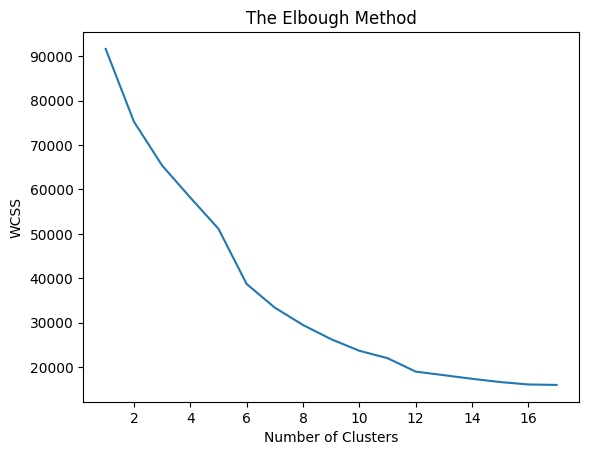

In [21]:
plt.plot(range(1,18),wcss)
plt.title("The Elbough Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Question 3
##### 3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [22]:
df.head()

,status_type_link,status_type_photo,status_type_status,status_type_video,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.0,0.0,0.0,1.0,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,0.0,1.0,0.0,0.0,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,0.0,0.0,0.0,1.0,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,0.0,1.0,0.0,0.0,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,0.0,1.0,0.0,0.0,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


##### Training the KMeans model on the dataset

In [28]:
kmeans = KMeans(n_clusters=6,init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['cluster'] = y_pred

features = ['status_type_link',	'status_type_photo','status_type_status','status_type_video','status_published','num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']
# View cluster assignments
df[['cluster'] + features].head()

,cluster,status_type_link,status_type_photo,status_type_status,status_type_video,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,5,0.0,0.0,0.0,1.0,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,0,0.0,1.0,0.0,0.0,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,5,0.0,0.0,0.0,1.0,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,0,0.0,1.0,0.0,0.0,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,0,0.0,1.0,0.0,0.0,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


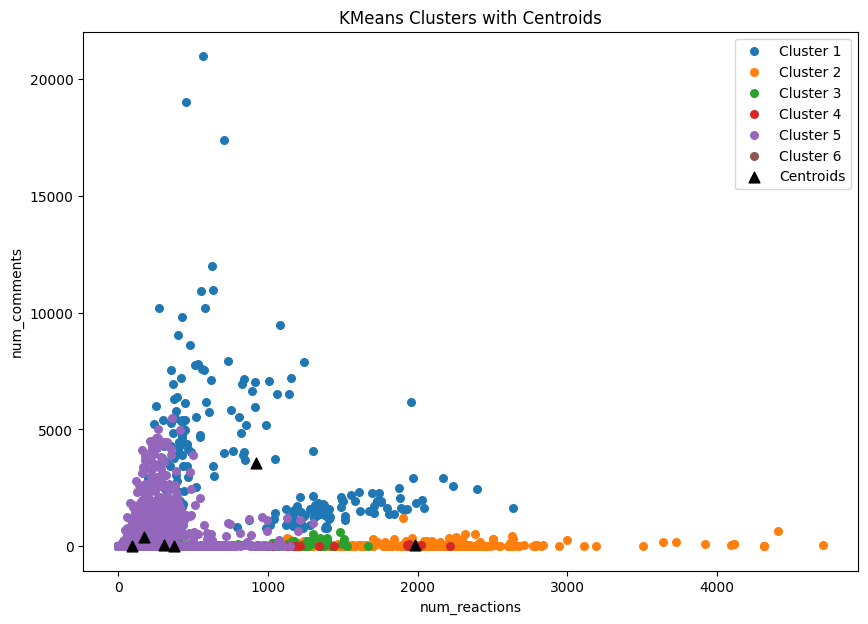

In [30]:
import matplotlib.pyplot as plt

# Choose two features for 2D visualization
x_feature = 'num_reactions'
y_feature = 'num_comments'

plt.figure(figsize=(10, 7))

# Plot each cluster
for cluster in range(1,7):
    cluster_points = df[df['cluster'] == cluster]
    plt.scatter(
        cluster_points[x_feature],
        cluster_points[y_feature],
        label=f'Cluster {cluster}',
        s=30
    )

# Plot centroids (inverse transform to original scale if needed)
centroids = kmeans.cluster_centers_
# If you scaled your data, inverse transform the centroids:
centroids_original = scaler.inverse_transform(centroids)
plt.scatter(
    centroids_original[:, X_new.columns.get_loc(x_feature)],
    centroids_original[:, X_new.columns.get_loc(y_feature)],
    s=60, c='black', marker='^', label='Centroids'
)

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('KMeans Clusters with Centroids')
plt.legend()
plt.show()

# Question 5
##### 5.	What is the count of different types of posts in the dataset?

In [25]:
# Sum each one-hot encoded status_type column
status_type_columns = [col for col in df.columns if col.startswith('status_type_')]
df[status_type_columns].sum()

status_type_link        63.0
status_type_photo     4288.0
status_type_status     365.0
status_type_video     2334.0
dtype: object

# Question 6
##### 6.	What is the average value of num_reaction, num_comments, num_shares for each post type

In [26]:
original_df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [27]:
original_df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

,num_reactions,num_comments,num_shares
status_type,,,
link,370.142857,5.698413,4.396825
photo,181.290345,15.993470,2.553871
status,438.783562,36.238356,2.558904
video,283.409597,642.478149,115.679949
